# Earthquake Kaggle Project

# STEP 1

Get an initial understanding of the problem

What are you predicting?
- In this competition, you will address when the earthquake will take place. Specifically, you’ll predict the time remaining before laboratory earthquakes occur from real-time seismic data.

How is the data generated?
- The data are from an experiment conducted on rock in a double direct shear geometry subjected to bi-axial loading, a classic laboratory earthquake model. (fig. a)
- Two fault gouge layers are sheared simultaneously while subjected to a constant normal load and a prescribed shear velocity. The laboratory faults fail in repetitive cycles of stick and slip that is meant to mimic the cycle of loading and failure on tectonic faults. While the experiment is considerably simpler than a fault in Earth, it shares many physical characteristics. (fig. b)
- Los Alamos' initial work showed that the prediction of laboratory earthquakes from continuous seismic data is possible in the case of quasi-periodic laboratory seismic cycles. In this competition, the team has provided a much more challenging dataset with considerably more aperiodic earthquake failures.

What is domain specific knowledge that is helpful for the problem? 
- By doing an internet search, a video describing the experiment is below. 

In [2]:
# Load package to display pictures and videos
from IPython.display import Audio, Image, YouTubeVideo

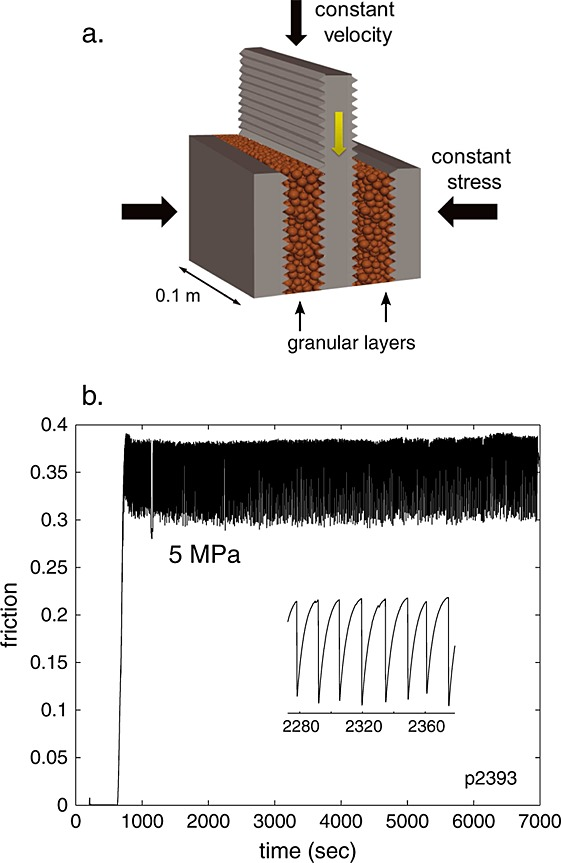

In [8]:
# Display a picture of related research when the file is in the working directory
Image(filename="b.jpg", width=400, height=400)

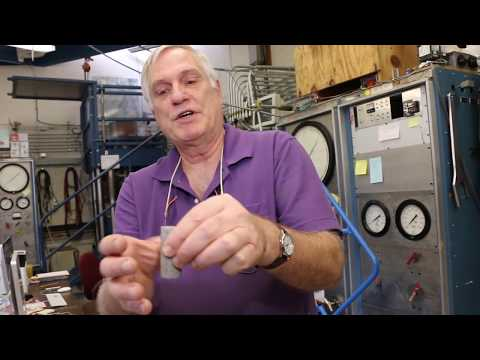

In [9]:
# Display a video using the id which is the string between the = and & (if there is an &)
YouTubeVideo(id='m_dBwwDJ4uo', width=600, height=400)

In the end we can see that the probes that are used are put under some kind of normal pressure but there is a shear stress working on it as well. Then, after some time, the probe splits. If you take a look at the additional material given, you can see that we have 3 kind of plates:
- Two plates left and right that are under normal pressure: Forces are acting with 90 degree on the plate, pushing the two plates together.
- One plate in the middle which is separated by some granular material. This plate moves downwards with constant velocity.

# STEP 2

- Install package on computer if needed. Need to do this only once.
- Import commonly used packages, specific module of package and commonly used modules as abbreviation.

In [2]:
# Import packages & specific modules.
# For file importing 
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# Ensure inline code
%matplotlib inline

import seaborn as sns
sns.set()

from IPython.display import HTML

# Ignore warnings that know will arise , NOTE: i don't think i will do this
#warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore", category=UserWarning)
#warnings.filterwarnings("ignore", category=FutureWarning)

# STEP 3

Initial examination of the data using descriptive statistics.

In [4]:
# Create a folder to download files and set to working directory.
os.chdir("C://Users/Sandra/earthquake")
# Get working directory to verify where working from.
os.getcwd()

'C:\\Users\\Sandra\\earthquake'

In [3]:
# List files in working directory.
os.listdir()

['b.jpg',
 'LANL-Earthquake-Prediction.zip',
 'sample_submission.csv',
 'test',
 'train.csv']

In [13]:
# Return the size of train data file, in bytes.
# Anything about 2 GB is considered a large file.
os.path.getsize('train.csv')

9555558244

In [14]:
# Return the size of a test data file, in bytes.
os.path.getsize('seg_ffe7cc.csv')

315890

Look at TRAIN DATA

The total size of the train data is almost 9 GB so load only a small part of the TRAIN data to get an idea of what is given.


In [9]:
# Load a small part of the TRAIN data.
trainS = pd.read_csv('train.csv', nrows=20000000)
trainS.head(n=10)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691
5,8,1.4691
6,9,1.4691
7,7,1.4691
8,-5,1.4691
9,3,1.4691


In [106]:
# If it seems like the column is all the same number, perhaps need more decimal places.
for n in range(5):
    print(trainS.time_to_failure.values[n])

1.4690999832
1.4690999821000001
1.4690999809999998
1.4690999799000002
1.4690999787999999


In [107]:
# Look at some descriptive statistics of sample file.
trainS.describe()

,acoustic_data,time_to_failure
count,2.000000e+07,2.000000e+07
mean,4.530006e+00,7.148903e+00
std,1.303243e+01,4.135720e+00
min,-4.621000e+03,7.954798e-04
25%,2.000000e+00,1.298899e+00
50%,5.000000e+00,8.943598e+00
75%,7.000000e+00,1.024270e+01
max,3.252000e+03,1.154080e+01


In [92]:
# Look at row & column names and data type of dataframe.
trainS.columns

Index(['acoustic_data', 'time_to_failure'], dtype='object')

In [93]:
# Look at type of data that each column is.
trainS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000000 entries, 0 to 19999999
Data columns (total 2 columns):
acoustic_data      int64
time_to_failure    float64
dtypes: float64(1), int64(1)
memory usage: 305.2 MB


In [28]:
# Unique values in a column.
trainS['signal'].value_counts()

 4       1229674
 5       1224039
 3       1099566
 6       1088576
 2        876453
 7        863488
 1        629279
 8        621422
 0        411997
 9        409097
-1        252762
 10       251571
 11       150632
-2        148583
 12        91015
-3         89091
 13        57320
-4         56029
 14        38888
-5         37579
 15        28056
-6         27418
 16        21540
-7         20940
 17        17018
-8         16456
 18        13845
-9         13308
 19        11409
-10        11178
          ...   
-2635          1
-2617          1
-2590          1
-2583          1
-2537          1
-2536          1
-3097          1
-3146          1
-3165          1
-3202          1
 3112          1
 3124          1
 3144          1
 3237          1
 3240          1
-4621          1
-4559          1
-4312          1
-4094          1
-3881          1
-3817          1
-3796          1
-3700          1
-3628          1
-3549          1
-3340          1
-3279          1
-3253         

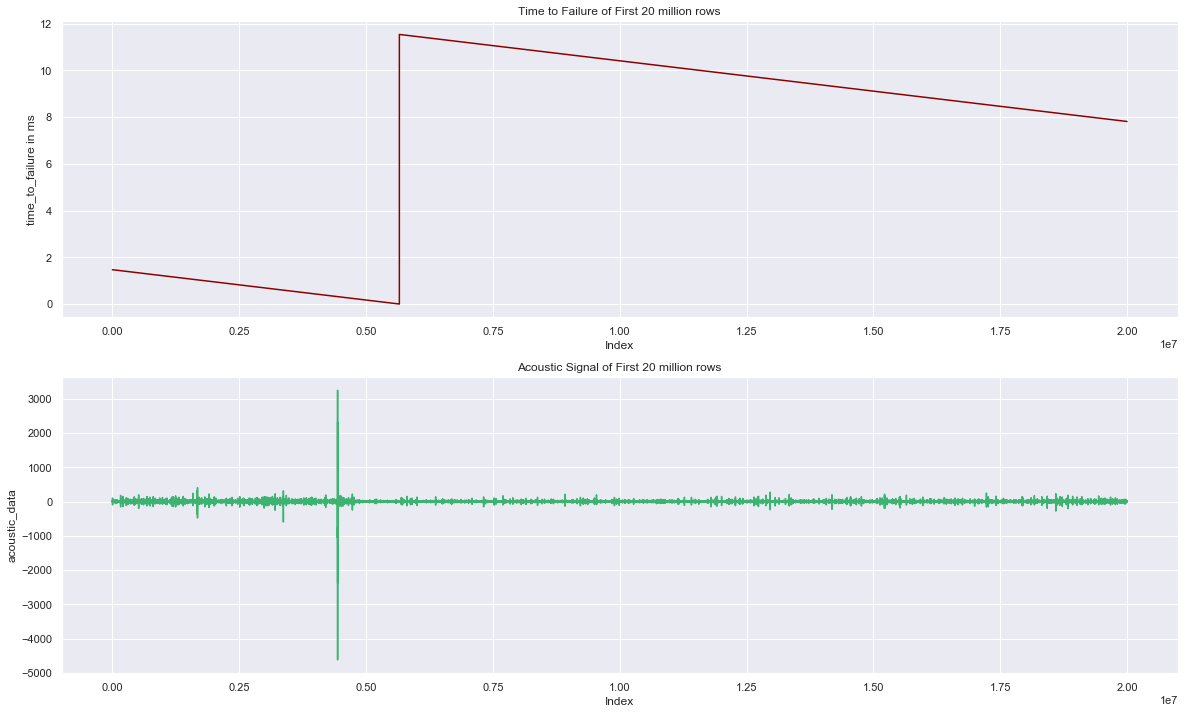

In [27]:
# Plot part of TRAIN file to determine what it looks like.
# Like to have features in separate charts so can look at each independently.
fig, ax = plt.subplots(2,1, figsize=(20,12))
ax[0].plot(trainS.index.values, trainS.time_to_failure.values, c="darkred")
ax[0].set_title("Time to Failure of First 20 million rows")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("time_to_failure in ms");
ax[1].plot(trainS.index.values, trainS.acoustic_data.values, c="mediumseagreen")
ax[1].set_title("Acoustic Signal of First 20 million rows")
ax[1].set_xlabel("Index")
ax[1].set_ylabel("acoustic_data");

Look at OVERALL dataset in order to get a full picture.
- In order to load the entire file, define acoustic_data as int16 and time_to_failure as float32 to save memory resources.
- However, specification of int16 or float32 may unexpectedly drop decimal places.
- Then plot the dataset sampled at every 50th value.

In [139]:
train = pd.read_csv('train.csv', dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})
train.head(n=5)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


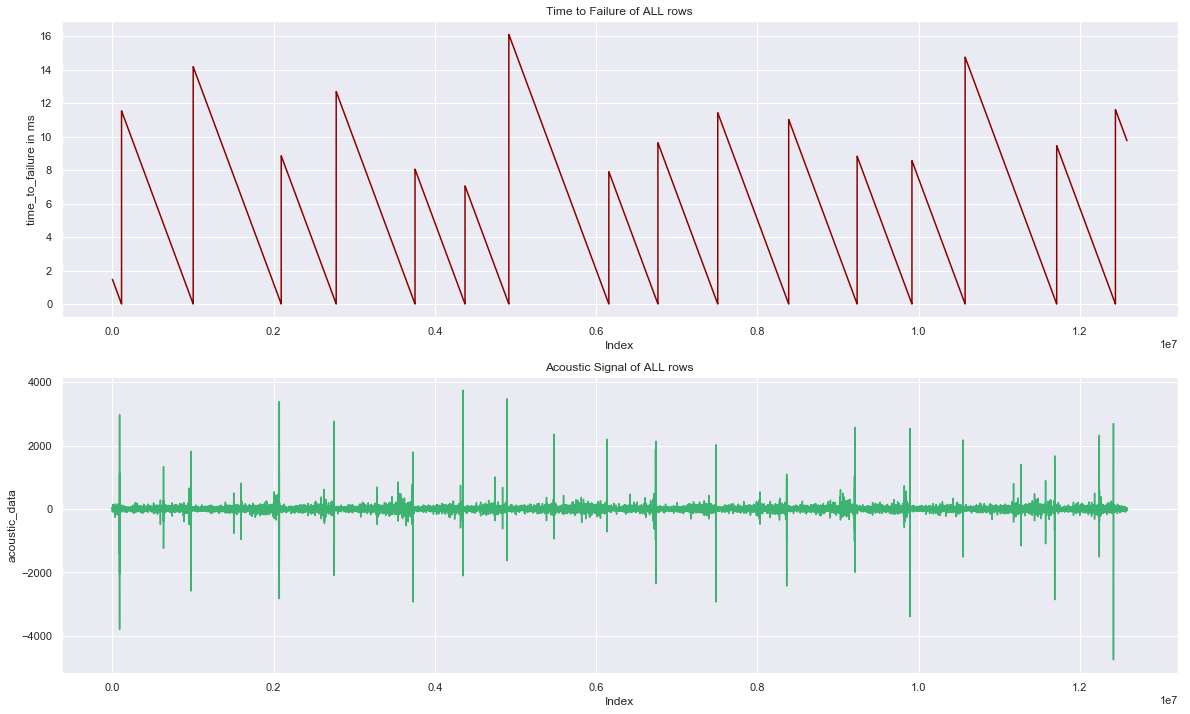

In [62]:
acoustic_data_small = train['acoustic_data'].values[::50]
time_to_failure_small = train['time_to_failure'].values[::50]
time_to_failureS = pd.DataFrame({'acoustic_data':acoustic_data_small,'time_to_failure':time_to_failure_small})

fig, ax = plt.subplots(2,1, figsize=(20,12))
ax[0].plot(time_to_failureS.index.values, time_to_failureS.time_to_failure.values, c="darkred")
ax[0].set_title("Time to Failure of ALL rows")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("time_to_failure in ms");
ax[1].plot(time_to_failureS.index.values, time_to_failureS.acoustic_data.values, c="mediumseagreen")
ax[1].set_title("Acoustic Signal of ALL rows")
ax[1].set_xlabel("Index")
ax[1].set_ylabel("acoustic_data");

del acoustic_data_small
del time_to_failure_small

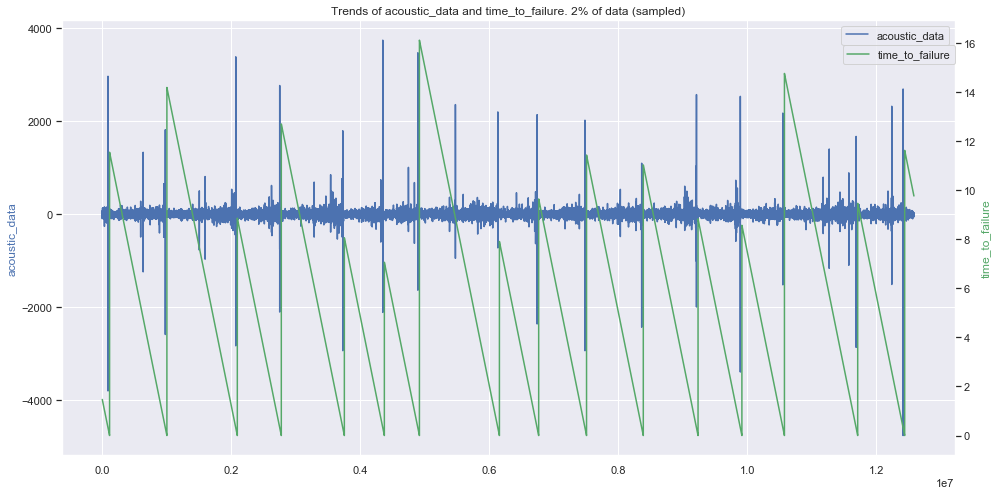

In [90]:
# plot the acoustic data and time_to_failure on top of each other to get a better idea of eathquake and spikes in acoustic data

train_acoustic_data_small = train['acoustic_data'].values[::50]
train_time_to_failure_small = train['time_to_failure'].values[::50]

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of acoustic_data and time_to_failure. 2% of data (sampled)")
plt.plot(train_acoustic_data_small, color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(train_time_to_failure_small, color='g')
ax2.set_ylabel('time_to_failure', color='g')
plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)

del train_acoustic_data_small
del train_time_to_failure_small

OBSERVATIONS about training data
- There are 2 columns. Acoustic_data has integer data and time_to_failure has decimal data of up to 16 decimal places.
- There don't seem to be any confounding variables.
- Both columns change in NON-equal increments.
- From describe function, there are no missing values or NAs.
- time_to_failure seems to decrease in value until a quake happens.
- The acoustic data has a large max and min but most is within a much smaller range.
- The time_to_failure data is in small increments and a small range.
- The time_to_failure varies from around 7 seconds to 16 seconds and is different for each of the 16 earthquakes.
- The failure time is not exactly zero but a very small number (eg. first time to failure is 7.954798e-04)
- In the train dataset, each column name will be changed to 1 word for ease of programming.
- Look at datatype of each column. Datatype will not be changed.
- Values in each column assumed to be unique since majority are.
- The train data is a single sequence and seems to come from one experiment alone. 
- In the train data, there are many small oscillations until at least 1 large peak acoustic signal occurs.
- An earthquake occurs almost everytime there is a large peak in acoustic value.
- The train dataset is very large so break each file up when the earthquake happens which is 16 different points in this case. It will be easier to visualize, work with and do statistically engineering on when the data is broken up. This assumes that once an earthquake happens, the dependence of prior acoustic signals is reset. That is, the one continous experiment is the same as if it were 16 individual experiments.  
- May decide to break up the train data on the large spikes as well and test.

Look at TEST DATA

In [64]:
# Load a small part of the TEST data to get an idea of what is given.
testS = pd.read_csv('test/seg_ffe7cc.csv', nrows=20000)
testS.head(n=10)

,acoustic_data
0,6
1,5
2,5
3,3
4,1
5,10
6,7
7,0
8,3
9,3


In [82]:
test_path = "../earthquake/test/"
test_files = os.listdir("../earthquake/test")
print(test_files[0:5])

['seg_00030f.csv', 'seg_0012b5.csv', 'seg_00184e.csv', 'seg_003339.csv', 'seg_0042cc.csv']


In [83]:
# How many test files are there?
len(test_files)

2624

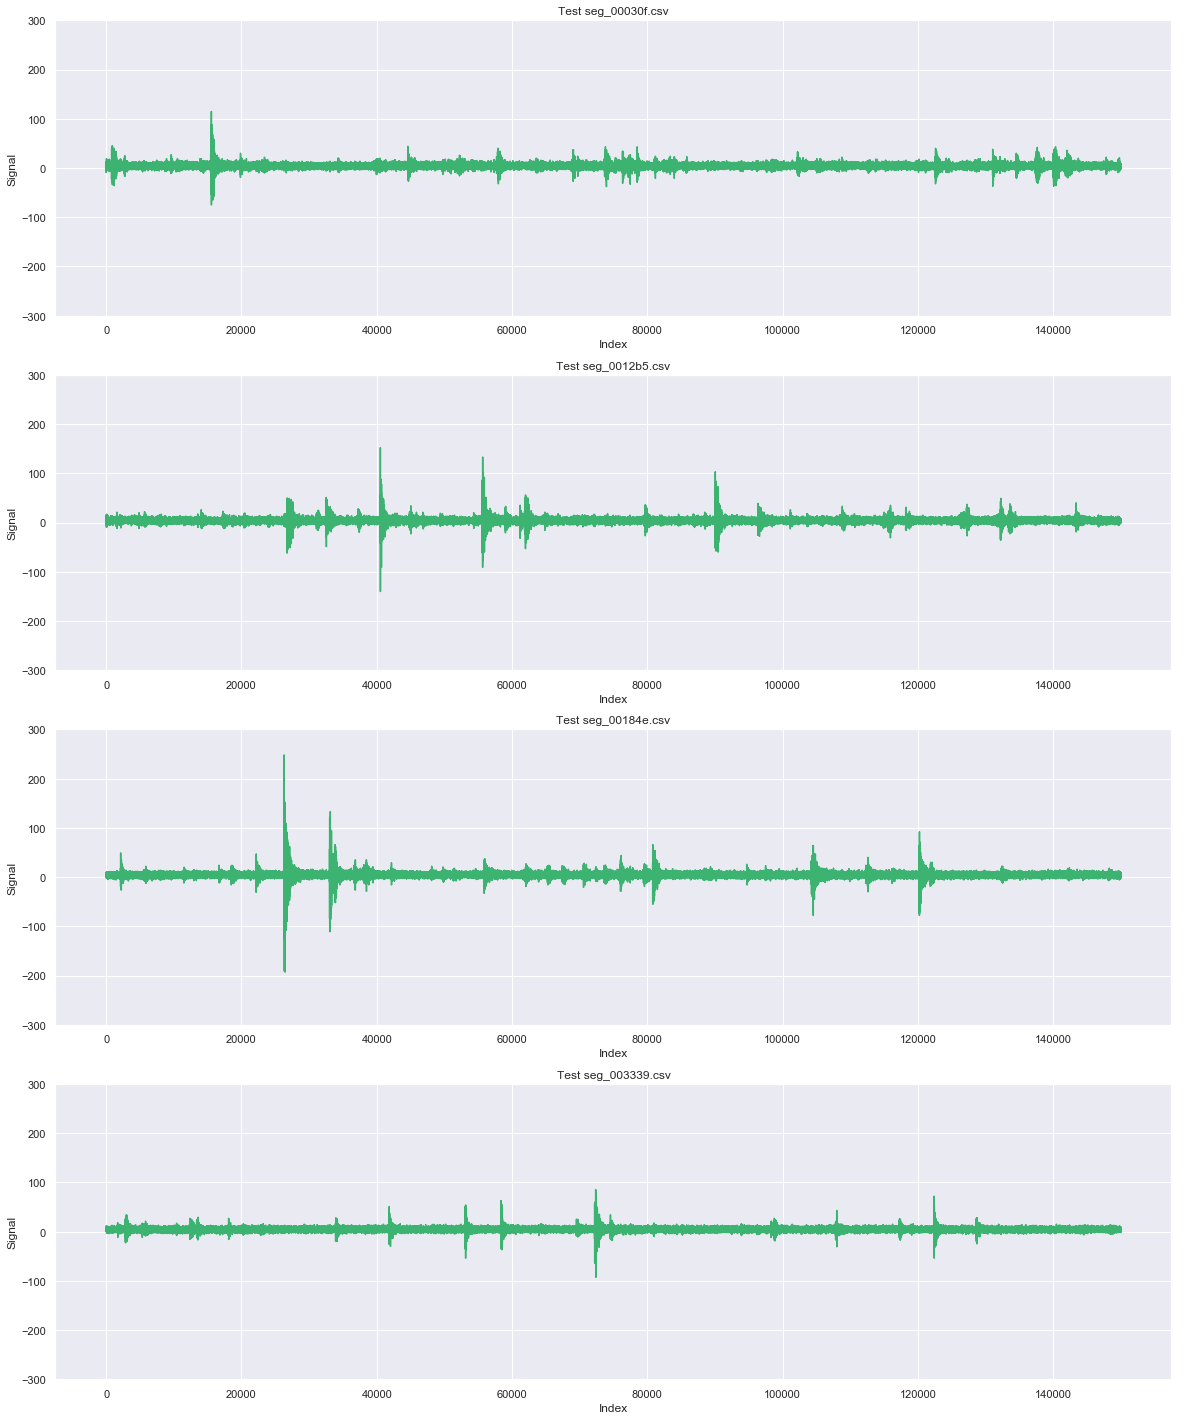

In [84]:
fig, ax = plt.subplots(4,1, figsize=(20,25))

for n in range(4):
    seg = pd.read_csv(test_path + test_files[n])
    ax[n].plot(seg.acoustic_data.values, c="mediumseagreen")
    ax[n].set_xlabel("Index")
    ax[n].set_ylabel("Signal")
    ax[n].set_ylim([-300, 300])
    ax[n].set_title("Test {}".format(test_files[n]));

OBSERVATIONS about test data
- The test data consists of several small files which is not a compete picture of the beginning of the earthquake to failure. They seem like individual snapshots along the timeline of an earthquake which can be at any point along the time_to_failure timeline.
- For each test data segment with its corresponding seg_id we are asked to predict it's single time until the lab earthquake takes place.
- There are 2624 test files where the time_to_failure must be predicted.
- Test files seem to be the same length but acoustic signals vary.

# STEP 4

By looking at the chart above with the full view of the data, can get an idea of where the earthquake happens. Then can get the exact row by reading in the rows around that point, using .describe to get the min and then the query to get the line number.


Where the earthquakes seem to happen:
- 1.
- 2. 50085877	0.000695
- 3. 
- 4. 
- 5. 
- 6. 
- 7. 
- 8. 
- 9.
- 10.
- 11.
- 12.
- 13.
- 14.
- 15.
- 16.

In [7]:
trainPart = pd.read_csv('train.csv', dtype={'time_to_failure': np.float64}, usecols=['time_to_failure'], nrows=100000000)
#del trainPart

In [14]:
trainPart.describe()

,time_to_failure
count,1.000000e+08
mean,6.447961e+00
std,3.842484e+00
min,6.954822e-04
25%,3.120298e+00
50%,6.366700e+00
75%,9.613998e+00
max,1.418060e+01


In [16]:
#trainPart.info()
trainPart.query('time_to_failure <= 0.000695483')

,time_to_failure
50085877,0.000695


In [ ]:
# Rename headers
trainS2.rename({"4": "acoustic_data", "7.8156963226":"time_to_failure"}, axis="columns", inplace=True)
trainS2.head(5)

In [11]:
# Find the row numbers in small train file where the earthquake happened
trainS.query('time_to_failure <= 0.00079548')

,acoustic_data,time_to_failure
5656573,4,0.000795


In [ ]:
del trainPart

In [13]:
# del trainPart
# Find the row numbers in part train file where the earthquake happened
trainPart = pd.read_csv('train.csv', dtype={'time_to_failure': np.float64}, usecols=['time_to_failure'], nrows=90000000)
#trainPart.query('time_to_failure <= 0.00079548')

In [133]:
# Chart the first earthquake
train1 = pd.read_csv('train.csv', nrows=5656573)
train1.head(5)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


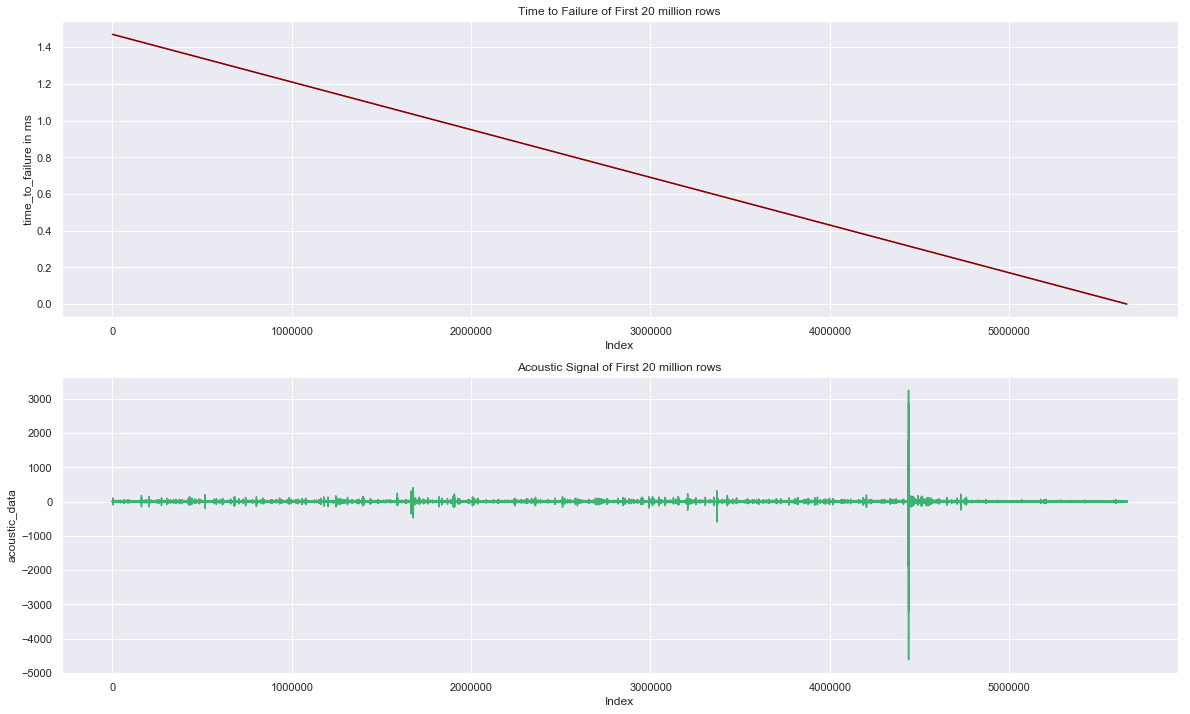

In [134]:
# Plot part of TRAIN file to determine what it looks like.
# Like to have features in separate charts so can look at each independently.
fig, ax = plt.subplots(2,1, figsize=(20,12))
ax[0].plot(train1.index.values, train1.time_to_failure.values, c="darkred")
ax[0].set_title("Time to Failure of First 20 million rows")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("time_to_failure in ms");
ax[1].plot(train1.index.values, train1.acoustic_data.values, c="mediumseagreen")
ax[1].set_title("Acoustic Signal of First 20 million rows")
ax[1].set_xlabel("Index")
ax[1].set_ylabel("acoustic_data");

In [30]:
# Rename headers
trainS2.rename({"4": "acoustic_data", "7.8156963226":"time_to_failure"}, axis="columns", inplace=True)
trainS2.head(5)

,acoustic_data,time_to_failure
0,4,7.815696
1,7,7.815696
2,2,7.815696
3,-1,7.815696
4,-1,7.815696


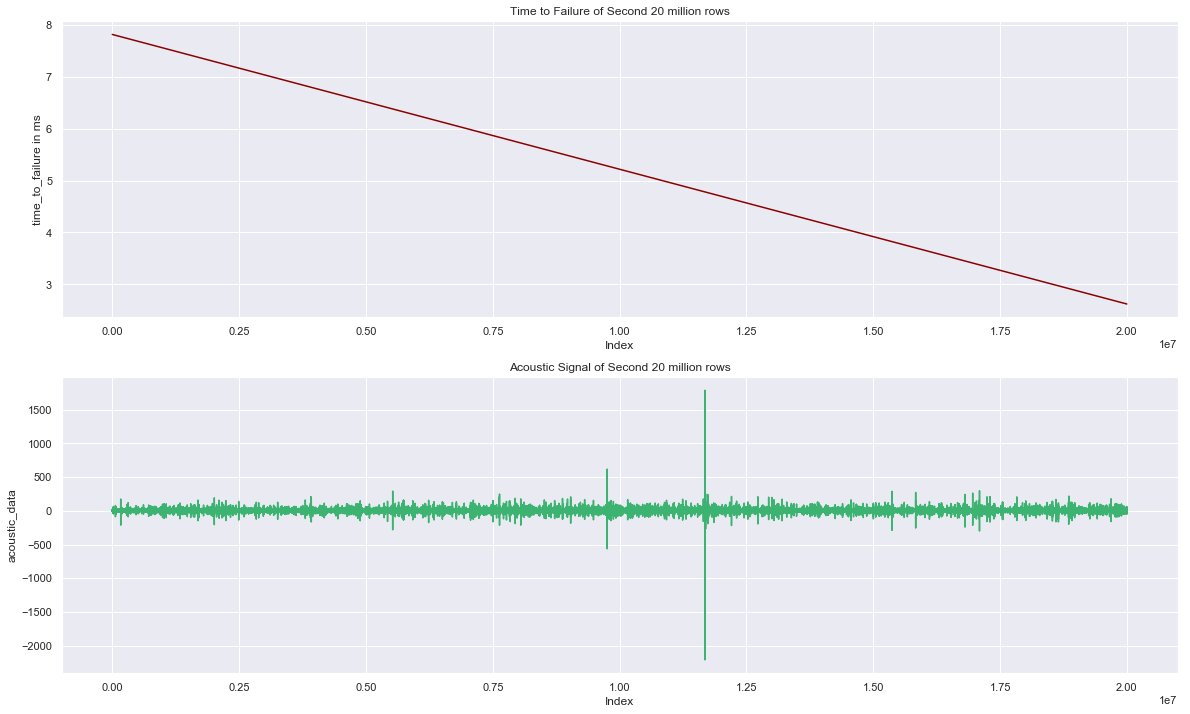

In [31]:
# Plot part of TRAIN file to determine what it looks like.
# Like to have features in separate charts so can look at each independently.
fig, ax = plt.subplots(2,1, figsize=(20,12))
ax[0].plot(trainS2.index.values, trainS2.time_to_failure.values, c="darkred")
ax[0].set_title("Time to Failure of Second 20 million rows")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("time_to_failure in ms");
ax[1].plot(trainS2.index.values, trainS2.acoustic_data.values, c="mediumseagreen")
ax[1].set_title("Acoustic Signal of Second 20 million rows")
ax[1].set_xlabel("Index")
ax[1].set_ylabel("acoustic_data");

Make modifications to files as observed from step 3 which:
- renaming columns in TRAIN file
- breaking up TRAIN file

In [39]:
# Rename columns for easier typing
train.rename({"acoustic_data": "signal", "time_to_failure": "quaketime"}, axis="columns", inplace=True)
train.head(5)

,signal,quaketime
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [ ]:
# Have to determine which row number the 16 earthquakes happen at. These will be the points where the data is broken up.

# STEP 5